### **Fundamentos de Aprendizaje Automático**
### Universidad Autónoma de Madrid, Escuela Politécnica Superior
### Grado en Ingeniería Informática, 4º curso
# **Práctica 2: K-NN y K-MEANS**

## Autores:  
Diego Araque Fernández  
Angela Valderrama Ricaldi

# Introducción

Esta práctica consta de tres apartados relacionados con los algoritmos de clasificación K-NN y K-Means. En el primer apartado se implementa nuestro propio clasificador KNN, utilizando la distancia euclídea, normalizando o no los datos de los datasets Heart y WDBC. En el segundo apartado se implementa el algoritmo K-Means y se prueba con el dataset de Iris, donde se pueden apreciar los diferentes clusteres creados. Por último, en el tercer apartado se utiliza de la librería de Scikit-Learn el clasificador KNN y el algoritmo K-Means para comparar los resultados obtenidos con los nuestros.

# 1. Clasificador K Nearest Neighbors (K-NN)

El clasificador K Nearest Neighbors (KNN) se ha implementado en el fichero `ClasificadorKNN.py`, siendo una clase que hereda de Clasificador y que implementa los métodos `entrenamiento` y `clasifica`.

Como ya sabemos, KNN es un clasificador de aprendizaje supervisado no paramétrico, es decir, no asume nada sobre la distribución de los datos. KNN utiliza la proximidad para clasificar o predecir sobre nuevos datos. Para calcular la proximidad, es muy común utilizar la distancia euclídea, aunque también se suele hacer uso de otras distancias como la distancia de Manhattan o la distancia de Minkowski, entre otras. En nuestra implementación, hemos utilizado la distancia euclídea:

$$d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$$

donde $x$ e $y$ son dos vectores de $n$ dimensiones.

El nombre de este clasificador viene dado por el hecho de que, para clasificar un nuevo dato, se calcula la distancia a los diferentes datos y se eligen los $k$ vecinos más cercanos. De estos, la clase que más aparezca entre esos datos, será la clase a asignar. Por ello, el valor de k es muy importante, ya que se puede estar sobreajustando o subajustando el modelo. Además, para evitar que haya empates, se suele elegir un valor impar para k. En nuestra implementación, se ha probado con los siguientes valores de k: 1, 3, 5, 11, 21 y 31.

Nuestra implementación de KNN permite normalizar o no los datos. La normalización de los datos influye en el resultado final, estando los datos muy dispersos o no. Los únicos datos que se normalizan son los pertenecientes a atributos numéricos. Por ello, a cada dato numérico se le resta la media de todos los datos numéricos y se divide entre la desviación típica de todos los datos numéricos. La normalización se realiza en el método `entrenamiento`, ya que es necesario conocer la media y la desviación típica de los datos para poder normalizarlos. En el método `clasifica`, se normalizan los datos de test utilizando la media y la desviación típica de los datos de entrenamiento. La normalización de los datos se realiza de la siguiente manera:

$$x_{norm} = \frac{x-\mu}{\sigma}$$

donde $x$ es el dato a normalizar, $\mu$ es la media de los datos y $\sigma$ es la desviación típica de los datos.

Como se ha mencionado antes, la métrica a utilizar es la distancia euclídea. Normalmente, esta distancia trabaja mejor con atributos numéricos y con valores discretizados es recomendable la distancia de Hamming. En este caso, se ha utilizado la distancia euclídea para todos los atributos.

En el método `clasifica`, se calcula la distancia euclídea entre el dato a clasificar y todos los datos de entrenamiento. Se ordenan las distancias de menor a mayor y se eligen los $k$ vecinos más cercanos. De estos vecinos, se elige la clase que más aparezca y se guarda la clase predicha en una lista. Por último, se devuelve la lista de clases predichas.

Las pruebas del clasificador se harán con los datasets Heart y WDBC, tanto para datos normalizados como no normalizados, usando los dos tipos de estrategia de particionado y con los diferentes valores de k mencionados anteriormente.

In [1]:
from Datos import Datos
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
from ClasificadorKNN import ClasificadorKNN
from ClusteringKMeans import K_Means

import numpy as np
from tabulate import tabulate

In [2]:
# load datasets to test
heart = Datos('datasets/heart.csv')
wdbc = Datos('datasets/wdbc.csv')
iris = Datos('datasets/iris.csv')

In [3]:
# create classifiers with different number of neighbours (k value to test: 1, 3, 5, 11, 21, 31)

# normalize data
myknn_1 = ClasificadorKNN(k=1)
myknn_3 = ClasificadorKNN(k=3)
myknn_5 = ClasificadorKNN(k=5)
myknn_11 = ClasificadorKNN(k=11)
myknn_21 = ClasificadorKNN(k=21)
myknn_31 = ClasificadorKNN(k=31)

# do not normalize data
not_myknn_1 = ClasificadorKNN(k=1, normalize=False)
not_myknn_3 = ClasificadorKNN(k=3, normalize=False)
not_myknn_5 = ClasificadorKNN(k=5, normalize=False)
not_myknn_11 = ClasificadorKNN(k=11, normalize=False)
not_myknn_21 = ClasificadorKNN(k=21, normalize=False)
not_myknn_31 = ClasificadorKNN(k=31, normalize=False)

## Heart Dataset

In [4]:
# hold-out validation (10 sample)
vs = ValidacionSimple(10, 0.3)

errors_vs_heart = {"k=1": np.array([]), "k=3": np.array([]), "k=5": np.array([]), "k=11": np.array([]), "k=21": np.array([]), "k=31": np.array([])}

# validate classifiers with heart dataset
errors_vs_heart["k=1"] = myknn_1.validacion(vs, heart, myknn_1)
errors_vs_heart["k=3"] = myknn_3.validacion(vs, heart, myknn_3)
errors_vs_heart["k=5"] = myknn_5.validacion(vs, heart, myknn_5)
errors_vs_heart["k=11"] = myknn_11.validacion(vs, heart, myknn_11)
errors_vs_heart["k=21"] = myknn_21.validacion(vs, heart, myknn_21)
errors_vs_heart["k=31"] = myknn_31.validacion(vs, heart, myknn_31)

# calculate mean accuracy
accuracy_vs_myknn1 = np.mean(1 - np.array(errors_vs_heart["k=1"]))
accuracy_vs_myknn3 = np.mean(1 - np.array(errors_vs_heart["k=3"]))
accuracy_vs_myknn5 = np.mean(1 - np.array(errors_vs_heart["k=5"]))
accuracy_vs_myknn11 = np.mean(1 - np.array(errors_vs_heart["k=11"]))
accuracy_vs_myknn21 = np.mean(1 - np.array(errors_vs_heart["k=21"]))
accuracy_vs_myknn31 = np.mean(1 - np.array(errors_vs_heart["k=31"]))

# calculate mean error rate
error_rate_vs_myknn1 = np.mean(errors_vs_heart["k=1"])
error_rate_vs_myknn3 = np.mean(errors_vs_heart["k=3"])
error_rate_vs_myknn5 = np.mean(errors_vs_heart["k=5"])
error_rate_vs_myknn11 = np.mean(errors_vs_heart["k=11"])
error_rate_vs_myknn21 = np.mean(errors_vs_heart["k=21"])
error_rate_vs_myknn31 = np.mean(errors_vs_heart["k=31"])

# calculate std error rate
std_error_rate_vs_myknn1 = np.std(errors_vs_heart["k=1"])
std_error_rate_vs_myknn3 = np.std(errors_vs_heart["k=3"])
std_error_rate_vs_myknn5 = np.std(errors_vs_heart["k=5"])
std_error_rate_vs_myknn11 = np.std(errors_vs_heart["k=11"])
std_error_rate_vs_myknn21 = np.std(errors_vs_heart["k=21"])
std_error_rate_vs_myknn31 = np.std(errors_vs_heart["k=31"])

In [5]:
# cross-validation (10 folds)
vc = ValidacionCruzada(10)

errors_vc_heart = {"k=1": np.array([]), "k=3": np.array([]), "k=5": np.array([]), "k=11": np.array([]), "k=21": np.array([]), "k=31": np.array([])}

# validate classifiers with heart dataset
errors_vc_heart["k=1"] = myknn_1.validacion(vc, heart, myknn_1)
errors_vc_heart["k=3"] = myknn_3.validacion(vc, heart, myknn_3)
errors_vc_heart["k=5"] = myknn_5.validacion(vc, heart, myknn_5)
errors_vc_heart["k=11"] = myknn_11.validacion(vc, heart, myknn_11)
errors_vc_heart["k=21"] = myknn_21.validacion(vc, heart, myknn_21)
errors_vc_heart["k=31"] = myknn_31.validacion(vc, heart, myknn_31)

# calculate mean accuracy
accuracy_vc_myknn1 = np.mean(1 - np.array(errors_vc_heart["k=1"]))
accuracy_vc_myknn3 = np.mean(1 - np.array(errors_vc_heart["k=3"]))
accuracy_vc_myknn5 = np.mean(1 - np.array(errors_vc_heart["k=5"]))
accuracy_vc_myknn11 = np.mean(1 - np.array(errors_vc_heart["k=11"]))
accuracy_vc_myknn21 = np.mean(1 - np.array(errors_vc_heart["k=21"]))
accuracy_vc_myknn31 = np.mean(1 - np.array(errors_vc_heart["k=31"]))

# calculate mean error rate
error_rate_vc_myknn1 = np.mean(errors_vc_heart["k=1"])
error_rate_vc_myknn3 = np.mean(errors_vc_heart["k=3"])
error_rate_vc_myknn5 = np.mean(errors_vc_heart["k=5"])
error_rate_vc_myknn11 = np.mean(errors_vc_heart["k=11"])
error_rate_vc_myknn21 = np.mean(errors_vc_heart["k=21"])
error_rate_vc_myknn31 = np.mean(errors_vc_heart["k=31"])

# calculate std error rate
std_error_rate_vc_myknn1 = np.std(errors_vc_heart["k=1"])
std_error_rate_vc_myknn3 = np.std(errors_vc_heart["k=3"])
std_error_rate_vc_myknn5 = np.std(errors_vc_heart["k=5"])
std_error_rate_vc_myknn11 = np.std(errors_vc_heart["k=11"])
std_error_rate_vc_myknn21 = np.std(errors_vc_heart["k=21"])
std_error_rate_vc_myknn31 = np.std(errors_vc_heart["k=31"])

/home/angela/Desktop/uam/FAA/faaenv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
# hold-out validation (10 sample)
vs = ValidacionSimple(10, 0.3)

errors_vs_not_heart = {"k=1": np.array([]), "k=3": np.array([]), "k=5": np.array([]), "k=11": np.array([]), "k=21": np.array([]), "k=31": np.array([])}

# validate classifiers with heart dataset
errors_vs_not_heart["k=1"] = not_myknn_1.validacion(vs, heart, not_myknn_1)
errors_vs_not_heart["k=3"] = not_myknn_3.validacion(vs, heart, not_myknn_3)
errors_vs_not_heart["k=5"] = not_myknn_5.validacion(vs, heart, not_myknn_5)
errors_vs_not_heart["k=11"] = not_myknn_11.validacion(vs, heart, not_myknn_11)
errors_vs_not_heart["k=21"] = not_myknn_21.validacion(vs, heart, not_myknn_21)
errors_vs_not_heart["k=31"] = not_myknn_31.validacion(vs, heart, not_myknn_31)

# calculate mean accuracy
accuracy_vs_not_myknn1 = np.mean(1 - np.array(errors_vs_not_heart["k=1"]))
accuracy_vs_not_myknn3 = np.mean(1 - np.array(errors_vs_not_heart["k=3"]))
accuracy_vs_not_myknn5 = np.mean(1 - np.array(errors_vs_not_heart["k=5"]))
accuracy_vs_not_myknn11 = np.mean(1 - np.array(errors_vs_not_heart["k=11"]))
accuracy_vs_not_myknn21 = np.mean(1 - np.array(errors_vs_not_heart["k=21"]))
accuracy_vs_not_myknn31 = np.mean(1 - np.array(errors_vs_not_heart["k=31"]))

# calculate mean error rate
error_rate_vs_not_myknn1 = np.mean(errors_vs_not_heart["k=1"])
error_rate_vs_not_myknn3 = np.mean(errors_vs_not_heart["k=3"])
error_rate_vs_not_myknn5 = np.mean(errors_vs_not_heart["k=5"])
error_rate_vs_not_myknn11 = np.mean(errors_vs_not_heart["k=11"])
error_rate_vs_not_myknn21 = np.mean(errors_vs_not_heart["k=21"])
error_rate_vs_not_myknn31 = np.mean(errors_vs_not_heart["k=31"])

# calculate std error rate
std_error_rate_vs_not_myknn1 = np.std(errors_vs_not_heart["k=1"])
std_error_rate_vs_not_myknn3 = np.std(errors_vs_not_heart["k=3"])
std_error_rate_vs_not_myknn5 = np.std(errors_vs_not_heart["k=5"])
std_error_rate_vs_not_myknn11 = np.std(errors_vs_not_heart["k=11"])
std_error_rate_vs_not_myknn21 = np.std(errors_vs_not_heart["k=21"])
std_error_rate_vs_not_myknn31 = np.std(errors_vs_not_heart["k=31"])

In [7]:
# cross-validation (10 folds)
vc = ValidacionCruzada(10)

errors_vc_not_heart = {"k=1": np.array([]), "k=3": np.array([]), "k=5": np.array([]), "k=11": np.array([]), "k=21": np.array([]), "k=31": np.array([])}

# validate classifiers with heart dataset
errors_vc_not_heart["k=1"] = not_myknn_1.validacion(vc, heart, not_myknn_1)
errors_vc_not_heart["k=3"] = not_myknn_3.validacion(vc, heart, not_myknn_3)
errors_vc_not_heart["k=5"] = not_myknn_5.validacion(vc, heart, not_myknn_5)
errors_vc_not_heart["k=11"] = not_myknn_11.validacion(vc, heart, not_myknn_11)
errors_vc_not_heart["k=21"] = not_myknn_21.validacion(vc, heart, not_myknn_21)
errors_vc_not_heart["k=31"] = not_myknn_31.validacion(vc, heart, not_myknn_31)

# calculate mean accuracy
accuracy_vc_not_myknn1 = np.mean(1 - np.array(errors_vc_not_heart["k=1"]))
accuracy_vc_not_myknn3 = np.mean(1 - np.array(errors_vc_not_heart["k=3"]))
accuracy_vc_not_myknn5 = np.mean(1 - np.array(errors_vc_not_heart["k=5"]))
accuracy_vc_not_myknn11 = np.mean(1 - np.array(errors_vc_not_heart["k=11"]))
accuracy_vc_not_myknn21 = np.mean(1 - np.array(errors_vc_not_heart["k=21"]))
accuracy_vc_not_myknn31 = np.mean(1 - np.array(errors_vc_not_heart["k=31"]))

# calculate mean error rate
error_rate_vc_not_myknn1 = np.mean(errors_vc_not_heart["k=1"])
error_rate_vc_not_myknn3 = np.mean(errors_vc_not_heart["k=3"])
error_rate_vc_not_myknn5 = np.mean(errors_vc_not_heart["k=5"])
error_rate_vc_not_myknn11 = np.mean(errors_vc_not_heart["k=11"])
error_rate_vc_not_myknn21 = np.mean(errors_vc_not_heart["k=21"])
error_rate_vc_not_myknn31 = np.mean(errors_vc_not_heart["k=31"])

# calculate std error rate
std_error_rate_vc_not_myknn1 = np.std(errors_vc_not_heart["k=1"])
std_error_rate_vc_not_myknn3 = np.std(errors_vc_not_heart["k=3"])
std_error_rate_vc_not_myknn5 = np.std(errors_vc_not_heart["k=5"])
std_error_rate_vc_not_myknn11 = np.std(errors_vc_not_heart["k=11"])
std_error_rate_vc_not_myknn21 = np.std(errors_vc_not_heart["k=21"])
std_error_rate_vc_not_myknn31 = np.std(errors_vc_not_heart["k=31"])

In [8]:
# print results

table_heart_myknn = [["k=1", accuracy_vs_myknn1, error_rate_vs_myknn1, std_error_rate_vs_myknn1, accuracy_vc_myknn1, error_rate_vc_myknn1, std_error_rate_vc_myknn1],
         ["k=3", accuracy_vs_myknn3, error_rate_vs_myknn3, std_error_rate_vs_myknn3, accuracy_vc_myknn3, error_rate_vc_myknn3, std_error_rate_vc_myknn3],
         ["k=5", accuracy_vs_myknn5, error_rate_vs_myknn5, std_error_rate_vs_myknn5, accuracy_vc_myknn5, error_rate_vc_myknn5, std_error_rate_vc_myknn5],
         ["k=11", accuracy_vs_myknn11, error_rate_vs_myknn11, std_error_rate_vs_myknn11, accuracy_vc_myknn11, error_rate_vc_myknn11, std_error_rate_vc_myknn11],
         ["k=21", accuracy_vs_myknn21, error_rate_vs_myknn21, std_error_rate_vs_myknn21, accuracy_vc_myknn21, error_rate_vc_myknn21, std_error_rate_vc_myknn21],
         ["k=31", accuracy_vs_myknn31, error_rate_vs_myknn31, std_error_rate_vs_myknn31, accuracy_vc_myknn31, error_rate_vc_myknn31, std_error_rate_vc_myknn31]]

print("Tabla de resultados - Heart Dataset (Normalizado)\n")
print("\t\t\t\t\t[Validación Simple]\t\t\t\t[Validación Cruzada]")
print(tabulate(table_heart_myknn, headers=["K Nearest Neighbors", "Accuracy", "Error (Mean)", "Error (Std)", "Accuracy - CV", "Error (Mean) - CV", "Error (Std) - CV"], tablefmt="fancy_grid"))

table_heart_not_myknn = [["k=1", accuracy_vs_not_myknn1, error_rate_vs_not_myknn1, std_error_rate_vs_not_myknn1, accuracy_vc_not_myknn1, error_rate_vc_not_myknn1, std_error_rate_vc_not_myknn1],
            ["k=3", accuracy_vs_not_myknn3, error_rate_vs_not_myknn3, std_error_rate_vs_not_myknn3, accuracy_vc_not_myknn3, error_rate_vc_not_myknn3, std_error_rate_vc_not_myknn3],
            ["k=5", accuracy_vs_not_myknn5, error_rate_vs_not_myknn5, std_error_rate_vs_not_myknn5, accuracy_vc_not_myknn5, error_rate_vc_not_myknn5, std_error_rate_vc_not_myknn5],
            ["k=11", accuracy_vs_not_myknn11, error_rate_vs_not_myknn11, std_error_rate_vs_not_myknn11, accuracy_vc_not_myknn11, error_rate_vc_not_myknn11, std_error_rate_vc_not_myknn11],
            ["k=21", accuracy_vs_not_myknn21, error_rate_vs_not_myknn21, std_error_rate_vs_not_myknn21, accuracy_vc_not_myknn21, error_rate_vc_not_myknn21, std_error_rate_vc_not_myknn21],
            ["k=31", accuracy_vs_not_myknn31, error_rate_vs_not_myknn31, std_error_rate_vs_not_myknn31, accuracy_vc_not_myknn31, error_rate_vc_not_myknn31, std_error_rate_vc_not_myknn31]]

print("\nTabla de resultados - Heart Dataset (No Normalizado)\n")
print("\t\t\t\t\t[Validación Simple]\t\t\t\t[Validación Cruzada]")
print(tabulate(table_heart_not_myknn, headers=["K Nearest Neighbors", "Accuracy", "Error (Mean)", "Error (Std)", "Accuracy - CV", "Error (Mean) - CV", "Error (Std) - CV"], tablefmt="fancy_grid"))

Tabla de resultados - Heart Dataset (Normalizado)

					[Validación Simple]				[Validación Cruzada]
╒═══════════════════════╤════════════╤════════════════╤═══════════════╤═════════════════╤═════════════════════╤════════════════════╕
│ K Nearest Neighbors   │   Accuracy │   Error (Mean) │   Error (Std) │   Accuracy - CV │   Error (Mean) - CV │   Error (Std) - CV │
╞═══════════════════════╪════════════╪════════════════╪═══════════════╪═════════════════╪═════════════════════╪════════════════════╡
│ k=1                   │   0.807273 │       0.192727 │     0.0159337 │        0.801624 │            0.198376 │          0.0430137 │
├───────────────────────┼────────────┼────────────────┼───────────────┼─────────────────┼─────────────────────┼────────────────────┤
│ k=3                   │   0.826545 │       0.173455 │     0.012964  │        0.825657 │            0.174343 │          0.0368709 │
├───────────────────────┼────────────┼────────────────┼───────────────┼─────────────────┼─────────────

En estas tablas se pueden observar los resultados de ejecutar el clasificador K Nearest Neighbors para diferentes valores de k, con los datos normalizados y no normalizados y con las dos estrategias de particionado. Los resultados obtenidos, son bastante buenos y eso se puede apreciar en el porcentaje de acierto y el de error. En un dataset normalizado, para la mayoría de los valores de k, el porcentaje de error es muy pequeño, por debajo del 20%. Entre la validación simple y la validación cruzada, nos encontramos con el detalle de la práctica anterior y es que la validación cruzada suele dar mejores resultados que la validación simple. Esto se debe a que, al utilizar la validación cruzada, se está utilizando un conjunto de test más grande y el modelo se ajusta mejor. Podemos suponer, que el porcentaje de acierto, que está por encima del 80% pero no llega al 90%, se debe a la distancia elegida para calcular la proximidad entre datos discretizados.


Por otro lado, cuando los datos no están normalizados, el porcentaje de error es mayor, llegando a superar el 30% en algunos casos. El contraste entre la validación simple y la cruzada es el mismo que en el caso anterior. En este caso, el porcentaje de acierto es menor que en el caso anterior, llegando a estar por debajo del 70% en muchas ocasiones. Además, es muy notable el hecho de que los datos no estén normalizados observando los valores de la desviación típica del error. Cuando los valores pertenecen a atributos numéricos, el cálculo de la distancia euclídea se ve afectado por la dispersión de los datos y eso se puede apreciar en la variación del procentaje de error.

Respecto a los valores de k, se podría decir que cuando k toma un valor muy pequeño (1, 3 o 5), el porcentaje de error es mayor que cuando k toma un valor mayor (11, 21 o 31). Esto se debe a que, cuando k es pequeño, se está sobreajustando el modelo y se está teniendo en cuenta demasiado a los vecinos más cercanos. Por otro lado, cuando k es grande, se está subajustando el modelo y se está teniendo en cuenta a muchos vecinos que no son tan cercanos. Por ello, los valores mínimos de error se suelen encontrar para valores de k intermedios, como 11 o 21.

## WDBC Dataset

In [9]:
# hold-out validation (10 sample)
vs = ValidacionSimple(10, 0.3)

errors_vs_wdbc = {"k=1": np.array([]), "k=3": np.array([]), "k=5": np.array([]), "k=11": np.array([]), "k=21": np.array([]), "k=31": np.array([])}

# validate classifiers with wdbc dataset
errors_vs_wdbc["k=1"] = myknn_1.validacion(vs, wdbc, myknn_1)
errors_vs_wdbc["k=3"] = myknn_3.validacion(vs, wdbc, myknn_3)
errors_vs_wdbc["k=5"] = myknn_5.validacion(vs, wdbc, myknn_5)
errors_vs_wdbc["k=11"] = myknn_11.validacion(vs, wdbc, myknn_11)
errors_vs_wdbc["k=21"] = myknn_21.validacion(vs, wdbc, myknn_21)
errors_vs_wdbc["k=31"] = myknn_31.validacion(vs, wdbc, myknn_31)

# calculate mean accuracy
accuracy_vs_myknn1 = np.mean(1 - np.array(errors_vs_wdbc["k=1"]))
accuracy_vs_myknn3 = np.mean(1 - np.array(errors_vs_wdbc["k=3"]))
accuracy_vs_myknn5 = np.mean(1 - np.array(errors_vs_wdbc["k=5"]))
accuracy_vs_myknn11 = np.mean(1 - np.array(errors_vs_wdbc["k=11"]))
accuracy_vs_myknn21 = np.mean(1 - np.array(errors_vs_wdbc["k=21"]))
accuracy_vs_myknn31 = np.mean(1 - np.array(errors_vs_wdbc["k=31"]))

# calculate mean error rate
error_rate_vs_myknn1 = np.mean(errors_vs_wdbc["k=1"])
error_rate_vs_myknn3 = np.mean(errors_vs_wdbc["k=3"])
error_rate_vs_myknn5 = np.mean(errors_vs_wdbc["k=5"])
error_rate_vs_myknn11 = np.mean(errors_vs_wdbc["k=11"])
error_rate_vs_myknn21 = np.mean(errors_vs_wdbc["k=21"])
error_rate_vs_myknn31 = np.mean(errors_vs_wdbc["k=31"])

# calculate std error rate
std_error_rate_vs_myknn1 = np.std(errors_vs_wdbc["k=1"])
std_error_rate_vs_myknn3 = np.std(errors_vs_wdbc["k=3"])
std_error_rate_vs_myknn5 = np.std(errors_vs_wdbc["k=5"])
std_error_rate_vs_myknn11 = np.std(errors_vs_wdbc["k=11"])
std_error_rate_vs_myknn21 = np.std(errors_vs_wdbc["k=21"])
std_error_rate_vs_myknn31 = np.std(errors_vs_wdbc["k=31"])

In [10]:
# cross-validation (10 folds)
vc = ValidacionCruzada(10)

errors_vc_wdbc = {"k=1": np.array([]), "k=3": np.array([]), "k=5": np.array([]), "k=11": np.array([]), "k=21": np.array([]), "k=31": np.array([])}

# validate classifiers with wdbc dataset
errors_vc_wdbc["k=1"] = myknn_1.validacion(vc, wdbc, myknn_1)
errors_vc_wdbc["k=3"] = myknn_3.validacion(vc, wdbc, myknn_3)
errors_vc_wdbc["k=5"] = myknn_5.validacion(vc, wdbc, myknn_5)
errors_vc_wdbc["k=11"] = myknn_11.validacion(vc, wdbc, myknn_11)
errors_vc_wdbc["k=21"] = myknn_21.validacion(vc, wdbc, myknn_21)
errors_vc_wdbc["k=31"] = myknn_31.validacion(vc, wdbc, myknn_31)

# calculate mean accuracy
accuracy_vc_myknn1 = np.mean(1 - np.array(errors_vc_wdbc["k=1"]))
accuracy_vc_myknn3 = np.mean(1 - np.array(errors_vc_wdbc["k=3"]))
accuracy_vc_myknn5 = np.mean(1 - np.array(errors_vc_wdbc["k=5"]))
accuracy_vc_myknn11 = np.mean(1 - np.array(errors_vc_wdbc["k=11"]))
accuracy_vc_myknn21 = np.mean(1 - np.array(errors_vc_wdbc["k=21"]))
accuracy_vc_myknn31 = np.mean(1 - np.array(errors_vc_wdbc["k=31"]))

# calculate mean error rate
error_rate_vc_myknn1 = np.mean(errors_vc_wdbc["k=1"])
error_rate_vc_myknn3 = np.mean(errors_vc_wdbc["k=3"])
error_rate_vc_myknn5 = np.mean(errors_vc_wdbc["k=5"])
error_rate_vc_myknn11 = np.mean(errors_vc_wdbc["k=11"])
error_rate_vc_myknn21 = np.mean(errors_vc_wdbc["k=21"])
error_rate_vc_myknn31 = np.mean(errors_vc_wdbc["k=31"])

# calculate std error rate
std_error_rate_vc_myknn1 = np.std(errors_vc_wdbc["k=1"])
std_error_rate_vc_myknn3 = np.std(errors_vc_wdbc["k=3"])
std_error_rate_vc_myknn5 = np.std(errors_vc_wdbc["k=5"])
std_error_rate_vc_myknn11 = np.std(errors_vc_wdbc["k=11"])
std_error_rate_vc_myknn21 = np.std(errors_vc_wdbc["k=21"])
std_error_rate_vc_myknn31 = np.std(errors_vc_wdbc["k=31"])

In [11]:
# hold-out validation (10 sample)
vs = ValidacionSimple(10, 0.3)

errors_vs_not_wdbc = {"k=1": np.array([]), "k=3": np.array([]), "k=5": np.array([]), "k=11": np.array([]), "k=21": np.array([]), "k=31": np.array([])}

# validate classifiers with wdbc dataset
errors_vs_not_wdbc["k=1"] = not_myknn_1.validacion(vs, wdbc, not_myknn_1)
errors_vs_not_wdbc["k=3"] = not_myknn_3.validacion(vs, wdbc, not_myknn_3)
errors_vs_not_wdbc["k=5"] = not_myknn_5.validacion(vs, wdbc, not_myknn_5)
errors_vs_not_wdbc["k=11"] = not_myknn_11.validacion(vs, wdbc, not_myknn_11)
errors_vs_not_wdbc["k=21"] = not_myknn_21.validacion(vs, wdbc, not_myknn_21)
errors_vs_not_wdbc["k=31"] = not_myknn_31.validacion(vs, wdbc, not_myknn_31)

# calculate mean accuracy
accuracy_vs_not_myknn1 = np.mean(1 - np.array(errors_vs_not_wdbc["k=1"]))
accuracy_vs_not_myknn3 = np.mean(1 - np.array(errors_vs_not_wdbc["k=3"]))
accuracy_vs_not_myknn5 = np.mean(1 - np.array(errors_vs_not_wdbc["k=5"]))
accuracy_vs_not_myknn11 = np.mean(1 - np.array(errors_vs_not_wdbc["k=11"]))
accuracy_vs_not_myknn21 = np.mean(1 - np.array(errors_vs_not_wdbc["k=21"]))
accuracy_vs_not_myknn31 = np.mean(1 - np.array(errors_vs_not_wdbc["k=31"]))

# calculate mean error rate
error_rate_vs_not_myknn1 = np.mean(errors_vs_not_wdbc["k=1"])
error_rate_vs_not_myknn3 = np.mean(errors_vs_not_wdbc["k=3"])
error_rate_vs_not_myknn5 = np.mean(errors_vs_not_wdbc["k=5"])
error_rate_vs_not_myknn11 = np.mean(errors_vs_not_wdbc["k=11"])
error_rate_vs_not_myknn21 = np.mean(errors_vs_not_wdbc["k=21"])
error_rate_vs_not_myknn31 = np.mean(errors_vs_not_wdbc["k=31"])

# calculate std error rate
std_error_rate_vs_not_myknn1 = np.std(errors_vs_not_wdbc["k=1"])
std_error_rate_vs_not_myknn3 = np.std(errors_vs_not_wdbc["k=3"])
std_error_rate_vs_not_myknn5 = np.std(errors_vs_not_wdbc["k=5"])
std_error_rate_vs_not_myknn11 = np.std(errors_vs_not_wdbc["k=11"])
std_error_rate_vs_not_myknn21 = np.std(errors_vs_not_wdbc["k=21"])
std_error_rate_vs_not_myknn31 = np.std(errors_vs_not_wdbc["k=31"])

In [12]:
# cross-validation (10 folds)
vc = ValidacionCruzada(10)

errors_vc_not_wdbc = {"k=1": np.array([]), "k=3": np.array([]), "k=5": np.array([]), "k=11": np.array([]), "k=21": np.array([]), "k=31": np.array([])}

# validate classifiers with wdbc dataset
errors_vc_not_wdbc["k=1"] = not_myknn_1.validacion(vc, wdbc, not_myknn_1)
errors_vc_not_wdbc["k=3"] = not_myknn_3.validacion(vc, wdbc, not_myknn_3)
errors_vc_not_wdbc["k=5"] = not_myknn_5.validacion(vc, wdbc, not_myknn_5)
errors_vc_not_wdbc["k=11"] = not_myknn_11.validacion(vc, wdbc, not_myknn_11)
errors_vc_not_wdbc["k=21"] = not_myknn_21.validacion(vc, wdbc, not_myknn_21)
errors_vc_not_wdbc["k=31"] = not_myknn_31.validacion(vc, wdbc, not_myknn_31)

# calculate mean accuracy
accuracy_vc_not_myknn1 = np.mean(1 - np.array(errors_vc_not_wdbc["k=1"]))
accuracy_vc_not_myknn3 = np.mean(1 - np.array(errors_vc_not_wdbc["k=3"]))
accuracy_vc_not_myknn5 = np.mean(1 - np.array(errors_vc_not_wdbc["k=5"]))
accuracy_vc_not_myknn11 = np.mean(1 - np.array(errors_vc_not_wdbc["k=11"]))
accuracy_vc_not_myknn21 = np.mean(1 - np.array(errors_vc_not_wdbc["k=21"]))
accuracy_vc_not_myknn31 = np.mean(1 - np.array(errors_vc_not_wdbc["k=31"]))

# calculate mean error rate
error_rate_vc_not_myknn1 = np.mean(errors_vc_not_wdbc["k=1"])
error_rate_vc_not_myknn3 = np.mean(errors_vc_not_wdbc["k=3"])
error_rate_vc_not_myknn5 = np.mean(errors_vc_not_wdbc["k=5"])
error_rate_vc_not_myknn11 = np.mean(errors_vc_not_wdbc["k=11"])
error_rate_vc_not_myknn21 = np.mean(errors_vc_not_wdbc["k=21"])
error_rate_vc_not_myknn31 = np.mean(errors_vc_not_wdbc["k=31"])

# calculate std error rate
std_error_rate_vc_not_myknn1 = np.std(errors_vc_not_wdbc["k=1"])
std_error_rate_vc_not_myknn3 = np.std(errors_vc_not_wdbc["k=3"])
std_error_rate_vc_not_myknn5 = np.std(errors_vc_not_wdbc["k=5"])
std_error_rate_vc_not_myknn11 = np.std(errors_vc_not_wdbc["k=11"])
std_error_rate_vc_not_myknn21 = np.std(errors_vc_not_wdbc["k=21"])
std_error_rate_vc_not_myknn31 = np.std(errors_vc_not_wdbc["k=31"])

In [13]:
# print results

table_wdbc_myknn = [["k=1", accuracy_vs_myknn1, error_rate_vs_myknn1, std_error_rate_vs_myknn1, accuracy_vc_myknn1, error_rate_vc_myknn1, std_error_rate_vc_myknn1],
         ["k=3", accuracy_vs_myknn3, error_rate_vs_myknn3, std_error_rate_vs_myknn3, accuracy_vc_myknn3, error_rate_vc_myknn3, std_error_rate_vc_myknn3],
         ["k=5", accuracy_vs_myknn5, error_rate_vs_myknn5, std_error_rate_vs_myknn5, accuracy_vc_myknn5, error_rate_vc_myknn5, std_error_rate_vc_myknn5],
         ["k=11", accuracy_vs_myknn11, error_rate_vs_myknn11, std_error_rate_vs_myknn11, accuracy_vc_myknn11, error_rate_vc_myknn11, std_error_rate_vc_myknn11],
         ["k=21", accuracy_vs_myknn21, error_rate_vs_myknn21, std_error_rate_vs_myknn21, accuracy_vc_myknn21, error_rate_vc_myknn21, std_error_rate_vc_myknn21],
         ["k=31", accuracy_vs_myknn31, error_rate_vs_myknn31, std_error_rate_vs_myknn31, accuracy_vc_myknn31, error_rate_vc_myknn31, std_error_rate_vc_myknn31]]

print("Tabla de resultados - WDBC Dataset (Normalizado)\n")
print("\t\t\t\t\t[Validación Simple]\t\t\t\t[Validación Cruzada]")
print(tabulate(table_wdbc_myknn, headers=["K Nearest Neighbors", "Accuracy", "Error (Mean)", "Error (Std)", "Accuracy - CV", "Error (Mean) - CV", "Error (Std) - CV"], tablefmt="fancy_grid"))

table_wdbc_not_myknn = [["k=1", accuracy_vs_not_myknn1, error_rate_vs_not_myknn1, std_error_rate_vs_not_myknn1, accuracy_vc_not_myknn1, error_rate_vc_not_myknn1, std_error_rate_vc_not_myknn1],
            ["k=3", accuracy_vs_not_myknn3, error_rate_vs_not_myknn3, std_error_rate_vs_not_myknn3, accuracy_vc_not_myknn3, error_rate_vc_not_myknn3, std_error_rate_vc_not_myknn3],
            ["k=5", accuracy_vs_not_myknn5, error_rate_vs_not_myknn5, std_error_rate_vs_not_myknn5, accuracy_vc_not_myknn5, error_rate_vc_not_myknn5, std_error_rate_vc_not_myknn5],
            ["k=11", accuracy_vs_not_myknn11, error_rate_vs_not_myknn11, std_error_rate_vs_not_myknn11, accuracy_vc_not_myknn11, error_rate_vc_not_myknn11, std_error_rate_vc_not_myknn11],
            ["k=21", accuracy_vs_not_myknn21, error_rate_vs_not_myknn21, std_error_rate_vs_not_myknn21, accuracy_vc_not_myknn21, error_rate_vc_not_myknn21, std_error_rate_vc_not_myknn21],
            ["k=31", accuracy_vs_not_myknn31, error_rate_vs_not_myknn31, std_error_rate_vs_not_myknn31, accuracy_vc_not_myknn31, error_rate_vc_not_myknn31, std_error_rate_vc_not_myknn31]]

print("\nTabla de resultados - WDBC Dataset (No Normalizado)\n")
print("\t\t\t\t\t[Validación Simple]\t\t\t\t[Validación Cruzada]")
print(tabulate(table_wdbc_not_myknn, headers=["K Nearest Neighbors", "Accuracy", "Error (Mean)", "Error (Std)", "Accuracy - CV", "Error (Mean) - CV", "Error (Std) - CV"], tablefmt="fancy_grid"))

Tabla de resultados - WDBC Dataset (Normalizado)

					[Validación Simple]				[Validación Cruzada]
╒═══════════════════════╤════════════╤════════════════╤═══════════════╤═════════════════╤═════════════════════╤════════════════════╕
│ K Nearest Neighbors   │   Accuracy │   Error (Mean) │   Error (Std) │   Accuracy - CV │   Error (Mean) - CV │   Error (Std) - CV │
╞═══════════════════════╪════════════╪════════════════╪═══════════════╪═════════════════╪═════════════════════╪════════════════════╡
│ k=1                   │   0.952353 │      0.0476471 │     0.0158824 │        0.950783 │           0.0492168 │          0.0311985 │
├───────────────────────┼────────────┼────────────────┼───────────────┼─────────────────┼─────────────────────┼────────────────────┤
│ k=3                   │   0.964118 │      0.0358824 │     0.01175   │        0.965695 │           0.0343045 │          0.0212955 │
├───────────────────────┼────────────┼────────────────┼───────────────┼─────────────────┼──────────────

Los resultados de ejecutar el clasificador KNN para el dataset WDBC resaltan bastante en comparación con los resultados obtenidos para el dataset Heart. En este caso, el porcentaje de acierto es muy alto, llegando a superar el 90% en algunos casos. Este set de datos está compuesto en su totalidad por atributos numéricos, con lo cual, la distancia euclídea es perfecta para calcular la proximidad entre los datos y no es necesario otro tipo de distancia para atributos discretizados ya que no los hay.

Cuando los datos están normalizados, el porcentaje de error es muy pequeño, llegando a estar por debajo del 10% en algunos casos. El uso de la validación simple o cruzada no supone un gran cambio en los datos, ya que el porcentaje de acierto es muy similar en ambos casos. Sin duda, los elevados procentajes de acierto se deben a la normalización de los datos continuos que influyen en el cómputo final de las distancias euclídeas.

Por otro lado, cuando los datos no están normalizados, el porcentaje de acierto es ligeramente más pequeño que en el caso anterior, pero sigue rondando el 90%. Como se mencionó antes, la normalización de los datos influye mucho en la dispersión de estos y en el cómputo de las distancias euclídeas. Los k vecinos elegidos pueden no ser los mismos en un set de datos normalizado que en uno no normalizado. No se aprecian apenas diferencias en el uso de validación simple o cruzada ya que ocurre lo mismo que en el caso anterior.

Por último, los valores de k influyen en el porcentaje de error de la misma manera que en el caso anterior. Cuando k es muy pequeño, se está sobreajustando el modelo y se está teniendo en cuenta demasiado a los vecinos más cercanos. Por otro lado, cuando k es grande, se está subajustando el modelo y se está teniendo en cuenta a muchos vecinos que no son tan cercanos. Por ello, los valores mínimos de error se suelen encontrar para valores de k intermedios, como 11 o 21.

# 2. Algoritmo de clustering K-Means

Empezamos el agrupamiento con distintas k, para luego comparar cual se ajusta mejor al problema. De antemano ya conocemos el dataset y sabemos que hay 3 clases de 50 flores cada una, pero probando para cada k queremos comprobar que de hecho k=3, es la que da el mejor comportamiento. A continuación se presentara una breve explicación de como se comporta el algoritmo.

## Funcionamiento del algoritmo

El algoritmo de K-Means es un algoritmo de agrupamiento, que se encarga de agrupar los datos en k grupos, donde k es un número entero positivo. El algoritmo funciona de la siguiente manera:

1. Se eligen k centroides aleatoriamente.
2. Se calcula la distancia de cada dato a cada centroide, en este caso decidimos usar la distacnia euclideana que usa la formula: $$euc(x,y) = \sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}$$
3. Se asigna cada dato al centroide más cercano.
4. Se recalcula el centroide de cada grupo usando la media de todos los datos del cluster de determinado centroide.
5. Se repiten los pasos 2, 3 y 4 hasta que los centroides no cambien.

In [14]:
k = [2,3,4,5]

# start k_means for each k
k_means_2 = K_Means(k[0])
k_means_3 = K_Means(k[1])
k_means_3_normalized = K_Means(k[1], True)
k_means_4 = K_Means(k[2])
k_means_5 = K_Means(k[3])

# train data
k_means_2.train(iris.datos, iris.diccionarios)
k_means_3.train(iris.datos, iris.diccionarios)
k_means_3_normalized.train(iris.datos, iris.diccionarios)
k_means_4.train(iris.datos, iris.diccionarios)
k_means_5.train(iris.datos, iris.diccionarios)

#### Comparación de K-Means con K=2, K=3, K=4, K=5, K=6

In [15]:
dicc = {}
dicc_normalized = {}
dicc_2 = {}
dicc_4 = {}
dicc_5 = {}
# for unormalized
for i in range(len(k_means_3.prev_clusters)):
    dicc[k_means_3.predicted[i]] = len(k_means_3.prev_clusters[i])

# for normalized
for i in range(len(k_means_3_normalized.prev_clusters)):
    dicc_normalized[k_means_3_normalized.predicted[i]] = len(k_means_3_normalized.prev_clusters[i])

# for k = 2
for i in range(len(k_means_2.prev_clusters)):
    dicc_2[k_means_2.predicted[i]] = len(k_means_2.prev_clusters[i])

# for k = 4
for i in range(len(k_means_4.prev_clusters)):
    dicc_4[k_means_4.predicted[i]] = len(k_means_4.prev_clusters[i])

# for k = 5
for i in range(len(k_means_5.prev_clusters)):
    dicc_5[k_means_5.predicted[i]] = len(k_means_5.prev_clusters[i])

table = [["KMeans - K=2", dicc_2["Iris-setosa"], dicc_2["Iris-virginica"]],
            ["KMeans - K=3", dicc["Iris-setosa"], dicc["Iris-versicolor"], dicc["Iris-virginica"]],
            ["KMeans - K=4", dicc_4["Iris-setosa"], dicc_4["Iris-versicolor"], dicc_4["Iris-virginica"]],
            ["KMeans - K=5", dicc_5["Iris-setosa"], dicc_5["Iris-versicolor"], dicc_5["Iris-virginica"]]]

print("Tabla de KMeans - K=2, K=3, K=4, K=5")
print(tabulate(table, headers=["", "Iris Setosa", "Iris Versicolor", "Iris Virginica"], tablefmt="fancy_grid"))

Tabla de KMeans - K=2, K=3, K=4, K=5
╒══════════════╤═══════════════╤═══════════════════╤══════════════════╕
│              │   Iris Setosa │   Iris Versicolor │   Iris Virginica │
╞══════════════╪═══════════════╪═══════════════════╪══════════════════╡
│ KMeans - K=2 │            53 │                97 │                  │
├──────────────┼───────────────┼───────────────────┼──────────────────┤
│ KMeans - K=3 │            50 │                62 │               38 │
├──────────────┼───────────────┼───────────────────┼──────────────────┤
│ KMeans - K=4 │            49 │                22 │               34 │
├──────────────┼───────────────┼───────────────────┼──────────────────┤
│ KMeans - K=5 │            49 │                36 │               18 │
╘══════════════╧═══════════════╧═══════════════════╧══════════════════╛


Antes de analizar hacer el kmeans, ya conociamos los datos del Iris dataset. Sabemos que hay 3 clases de 50 flores cada una. K=2 se queda muy corta, debido a que nunca clasifica a una de las flores. K=4, K=5 terminan haciendo muchos clusters que pueden terminar representadno a la misma clase, lo cual no es el comportamiento que buscamos ya que solo queremos un cluster que represente a todas las clases.

De las k analizadas la mejor es la 3, que clasifica a la setosa perfectamente. Aunque no clasifica a la versicolor y virginica de manera perfecta, si que lo hace de manera muy buena. Por lo tanto, podemos decir que k=3 es la mejor opción para este dataset. Esto igual se comprueba con la información que teniamos de antemano de nuestro dataset, ya que sabiamos que solo existian 3 clases (setosa, versicolor y virginica).

#### Comparación de K-Means con K=3, uno normalizado y otro no

In [16]:
table = [["Datos no Normalizados", dicc["Iris-setosa"], dicc["Iris-versicolor"], dicc["Iris-virginica"]],
            ["Datos Normalizados", dicc_normalized["Iris-setosa"], dicc_normalized["Iris-versicolor"], dicc_normalized["Iris-virginica"]]]

print("Tabla de KMeans - K=3")
print(tabulate(table, headers=["", "Iris Setosa", "Iris Versicolor", "Iris Virginica"], tablefmt="fancy_grid"))

Tabla de KMeans - K=3
╒═══════════════════════╤═══════════════╤═══════════════════╤══════════════════╕
│                       │   Iris Setosa │   Iris Versicolor │   Iris Virginica │
╞═══════════════════════╪═══════════════╪═══════════════════╪══════════════════╡
│ Datos no Normalizados │            50 │                62 │               38 │
├───────────────────────┼───────────────┼───────────────────┼──────────────────┤
│ Datos Normalizados    │            50 │                56 │               44 │
╘═══════════════════════╧═══════════════╧═══════════════════╧══════════════════╛


Para comparar la k=3 que sabemos es la mejor con datos normalizados y no normalizados, observamos que siempre se clasifica la Iris Setosa con sus 50 flores. El cambio se ve en las otras dos clases que se confunden entre ellas, pero en el caso de los datos normalizados se confunden menos. Con esto podemos concluir que la normalización de los datos para hacer el agrupamiento puede ayudar a mejorar el algoritmo.

#### Flores que se clasifican mejor

En las tablas anteriores se oberva como la flor Iris Setosa se clasifica perfectamente en todos los casos en los que k=3. Esto se debe a que la Iris Setosa tiene caracteristicas muy diferentes a las otras dos flores, por lo que es muy facil clasificarla. En cambio, las otras dos flores se confunden entre ellas, ya que tienen caracteristicas muy parecidas.

# 3. Librería de Scikit-Learn para K-NN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import pandas as pd

## Heart Dataset

In [18]:
# divide data into train and test (Hold-out)
X_heart, y_heart = heart.datos.iloc[:, :-1].values, heart.datos.iloc[:, -1].values

In [19]:
# create classifiers with different number of neighbours
scikit_heart_knn1 = KNeighborsClassifier(n_neighbors=1)
scikit_heart_knn3 = KNeighborsClassifier(n_neighbors=3)
scikit_heart_knn5 = KNeighborsClassifier(n_neighbors=5)
scikit_heart_knn11 = KNeighborsClassifier(n_neighbors=11)
scikit_heart_knn21 = KNeighborsClassifier(n_neighbors=21)
scikit_heart_knn31 = KNeighborsClassifier(n_neighbors=31)

In [20]:
# hold-out validation (10 samples)

num_samples = 10

accuracy_scores_heart = {"k=1": [], "k=3": [], "k=5": [], "k=11": [], "k=21": [], "k=31": [] }
error_rates_heart = {"k=1": [], "k=3": [], "k=5": [], "k=11": [], "k=21": [], "k=31": [] }

for i in range(num_samples):

    X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, test_size=0.3)

    # train classifiers
    scikit_heart_knn1.fit(X_train, y_train)
    scikit_heart_knn3.fit(X_train, y_train)
    scikit_heart_knn5.fit(X_train, y_train)
    scikit_heart_knn11.fit(X_train, y_train)
    scikit_heart_knn21.fit(X_train, y_train)
    scikit_heart_knn31.fit(X_train, y_train)

    # predict test data
    y_pred1 = scikit_heart_knn1.predict(X_test)
    y_pred3 = scikit_heart_knn3.predict(X_test)
    y_pred5 = scikit_heart_knn5.predict(X_test)
    y_pred11 = scikit_heart_knn11.predict(X_test)
    y_pred21 = scikit_heart_knn21.predict(X_test)
    y_pred31 = scikit_heart_knn31.predict(X_test)

    # calculate accuracy
    accuracy_scores_heart["k=1"].append(accuracy_score(y_test, y_pred1))
    accuracy_scores_heart["k=3"].append(accuracy_score(y_test, y_pred3))
    accuracy_scores_heart["k=5"].append(accuracy_score(y_test, y_pred5))
    accuracy_scores_heart["k=11"].append(accuracy_score(y_test, y_pred11))
    accuracy_scores_heart["k=21"].append(accuracy_score(y_test, y_pred21))
    accuracy_scores_heart["k=31"].append(accuracy_score(y_test, y_pred31))

    # calculate error rate
    error_rates_heart["k=1"].append(1 - accuracy_score(y_test, y_pred1))
    error_rates_heart["k=3"].append(1 - accuracy_score(y_test, y_pred3))
    error_rates_heart["k=5"].append(1 - accuracy_score(y_test, y_pred5))
    error_rates_heart["k=11"].append(1 - accuracy_score(y_test, y_pred11))
    error_rates_heart["k=21"].append(1 - accuracy_score(y_test, y_pred21))
    error_rates_heart["k=31"].append(1 - accuracy_score(y_test, y_pred31))

# calculate mean accuracy
accuracy_score_knn1 = np.mean(accuracy_scores_heart["k=1"])
accuracy_score_knn3 = np.mean(accuracy_scores_heart["k=3"])
accuracy_score_knn5 = np.mean(accuracy_scores_heart["k=5"])
accuracy_score_knn11 = np.mean(accuracy_scores_heart["k=11"])
accuracy_score_knn21 = np.mean(accuracy_scores_heart["k=21"])
accuracy_score_knn31 = np.mean(accuracy_scores_heart["k=31"])

# calculate mean error rate
error_rate_knn1 = np.mean(error_rates_heart["k=1"])
error_rate_knn3 = np.mean(error_rates_heart["k=3"])
error_rate_knn5 = np.mean(error_rates_heart["k=5"])
error_rate_knn11 = np.mean(error_rates_heart["k=11"])
error_rate_knn21 = np.mean(error_rates_heart["k=21"])
error_rate_knn31 = np.mean(error_rates_heart["k=31"])

# calculate std accuracy
std_knn1 = np.std(error_rates_heart["k=1"])
std_knn3 = np.std(error_rates_heart["k=3"])
std_knn5 = np.std(error_rates_heart["k=5"])
std_knn11 = np.std(error_rates_heart["k=11"])
std_knn21 = np.std(error_rates_heart["k=21"])
std_knn31 = np.std(error_rates_heart["k=31"])


In [21]:
# cross-validation (10 folds)
folds = 10

# KFold object
kf = KFold(n_splits=folds, shuffle=True)

accuracy_scores_heart_cv = {"k=1": [], "k=3": [], "k=5": [], "k=11": [], "k=21": [], "k=31": []}
error_rates_heart_cv = {"k=1": [], "k=3": [], "k=5": [], "k=11": [], "k=21": [], "k=31": []}

for train_index, test_index in kf.split(X_heart):

    X_train_cv_heart, X_test_cv_heart = X_heart[train_index], X_heart[test_index]
    y_train_cv_heart, y_test_cv_heart = y_heart[train_index], y_heart[test_index]

    # train classifiers
    scikit_heart_knn1.fit(X_train_cv_heart, y_train_cv_heart)
    scikit_heart_knn3.fit(X_train_cv_heart, y_train_cv_heart)
    scikit_heart_knn5.fit(X_train_cv_heart, y_train_cv_heart)
    scikit_heart_knn11.fit(X_train_cv_heart, y_train_cv_heart)
    scikit_heart_knn21.fit(X_train_cv_heart, y_train_cv_heart)
    scikit_heart_knn31.fit(X_train_cv_heart, y_train_cv_heart)

    y_pred_cv_heart1 = scikit_heart_knn1.predict(X_test_cv_heart)
    y_pred_cv_heart3 = scikit_heart_knn3.predict(X_test_cv_heart)
    y_pred_cv_heart5 = scikit_heart_knn5.predict(X_test_cv_heart)
    y_pred_cv_heart11 = scikit_heart_knn11.predict(X_test_cv_heart)
    y_pred_cv_heart21 = scikit_heart_knn21.predict(X_test_cv_heart)
    y_pred_cv_heart31 = scikit_heart_knn31.predict(X_test_cv_heart)

    # test classifiers
    accuracy_scores_heart_cv["k=1"].append(accuracy_score(y_test_cv_heart, y_pred_cv_heart1))
    accuracy_scores_heart_cv["k=3"].append(accuracy_score(y_test_cv_heart, y_pred_cv_heart3))
    accuracy_scores_heart_cv["k=5"].append(accuracy_score(y_test_cv_heart, y_pred_cv_heart5))
    accuracy_scores_heart_cv["k=11"].append(accuracy_score(y_test_cv_heart, y_pred_cv_heart11))
    accuracy_scores_heart_cv["k=21"].append(accuracy_score(y_test_cv_heart, y_pred_cv_heart21))
    accuracy_scores_heart_cv["k=31"].append(accuracy_score(y_test_cv_heart, y_pred_cv_heart31))

    # obtain errors
    error_rates_heart_cv["k=1"].append(1-accuracy_score(y_test_cv_heart, y_pred_cv_heart1))
    error_rates_heart_cv["k=3"].append(1-accuracy_score(y_test_cv_heart, y_pred_cv_heart3))
    error_rates_heart_cv["k=5"].append(1-accuracy_score(y_test_cv_heart, y_pred_cv_heart5))
    error_rates_heart_cv["k=11"].append(1-accuracy_score(y_test_cv_heart, y_pred_cv_heart11))
    error_rates_heart_cv["k=21"].append(1-accuracy_score(y_test_cv_heart, y_pred_cv_heart21))
    error_rates_heart_cv["k=31"].append(1-accuracy_score(y_test_cv_heart, y_pred_cv_heart31))

# calculate mean accuracy
accuracy_score_knn1_cv = np.mean(accuracy_scores_heart_cv["k=1"])
accuracy_score_knn3_cv = np.mean(accuracy_scores_heart_cv["k=3"])
accuracy_score_knn5_cv = np.mean(accuracy_scores_heart_cv["k=5"])
accuracy_score_knn11_cv = np.mean(accuracy_scores_heart_cv["k=11"])
accuracy_score_knn21_cv = np.mean(accuracy_scores_heart_cv["k=21"])
accuracy_score_knn31_cv = np.mean(accuracy_scores_heart_cv["k=31"])

# calculate mean error rate
error_rate_knn1_cv = np.mean(error_rates_heart_cv["k=1"])
error_rate_knn3_cv = np.mean(error_rates_heart_cv["k=3"])
error_rate_knn5_cv = np.mean(error_rates_heart_cv["k=5"])
error_rate_knn11_cv = np.mean(error_rates_heart_cv["k=11"])
error_rate_knn21_cv = np.mean(error_rates_heart_cv["k=21"])
error_rate_knn31_cv = np.mean(error_rates_heart_cv["k=31"])

# calculate std accuracy
std_knn1_cv = np.std(error_rates_heart_cv["k=1"])
std_knn3_cv = np.std(error_rates_heart_cv["k=3"])
std_knn5_cv = np.std(error_rates_heart_cv["k=5"])
std_knn11_cv = np.std(error_rates_heart_cv["k=11"])
std_knn21_cv = np.std(error_rates_heart_cv["k=21"])
std_knn31_cv = np.std(error_rates_heart_cv["k=31"])


In [22]:
table_scikit_heart = [["k = 1", accuracy_score_knn1, error_rate_knn1, std_knn1, accuracy_score_knn1_cv, error_rate_knn1_cv, std_knn1_cv],
            ["k = 3", accuracy_score_knn3, error_rate_knn3, std_knn3, accuracy_score_knn3_cv, error_rate_knn3_cv, std_knn3_cv],
            ["k = 5", accuracy_score_knn5, error_rate_knn5, std_knn5, accuracy_score_knn5_cv, error_rate_knn5_cv, std_knn5_cv],
            ["k = 11", accuracy_score_knn11, error_rate_knn11, std_knn11, accuracy_score_knn11_cv, error_rate_knn11_cv, std_knn11_cv],
            ["k = 21", accuracy_score_knn21, error_rate_knn21, std_knn21, accuracy_score_knn21_cv, error_rate_knn21_cv, std_knn21_cv],
            ["k = 31", accuracy_score_knn31, error_rate_knn31, std_knn31, accuracy_score_knn31_cv, error_rate_knn31_cv, std_knn31_cv]]

print("Tabla de resultados - Heart Dataset\n")
print("\t\t\t\t\t[Validación Simple]\t\t\t\t[Validación Cruzada]")
print(tabulate(table_scikit_heart, headers=["K Nearest Neighbors", "Accuracy", "Error (Mean)", "Error (Std)", "Accuracy - CV", "Error (Mean) - CV", "Error (Std) - CV"], tablefmt="fancy_grid"))


Tabla de resultados - Heart Dataset

					[Validación Simple]				[Validación Cruzada]
╒═══════════════════════╤════════════╤════════════════╤═══════════════╤═════════════════╤═════════════════════╤════════════════════╕
│ K Nearest Neighbors   │   Accuracy │   Error (Mean) │   Error (Std) │   Accuracy - CV │   Error (Mean) - CV │   Error (Std) - CV │
╞═══════════════════════╪════════════╪════════════════╪═══════════════╪═════════════════╪═════════════════════╪════════════════════╡
│ k = 1                 │   0.661594 │       0.338406 │     0.0203802 │        0.654623 │            0.345377 │          0.0412381 │
├───────────────────────┼────────────┼────────────────┼───────────────┼─────────────────┼─────────────────────┼────────────────────┤
│ k = 3                 │   0.683696 │       0.316304 │     0.0300113 │        0.680877 │            0.319123 │          0.043163  │
├───────────────────────┼────────────┼────────────────┼───────────────┼─────────────────┼─────────────────────┼─────

KNeighborsClassifier es el clasificador de la librería de Scikit-Learn que vamos a usar para clasificar según Vecinos Próximos. Tiene varios argumentos muy interesantes que influyen en el algoritmo a utilizar, como la métrica de distancia o el número de vecinos a utilizar, entre otros. Hemos dejado los valores por defecto para aplicar la distancia euclídea y hemos probados para el mismo número de vecinos que en la primera prueba de nuestro clasificador KNN, es decir, 1, 3, 5, 11, 21 y 31.

Recordemos que el dataset de Heart contiene atributos numéricos y categóricos, donde estos últimos siguen una codificación ordinal. Como ya hemos observado antes, la normalización de los datos influye en el resultado final, estando los datos muy dispersos o no. En este caso, los resultados obtenidos por el clasificador de la librería son muy semejantes a los obtenidos por nuestro clasificador con los datos no normalizados y en efecto, los datos proporcionados a este clasificador tampoco están normalizados.

Aunque la normalización de los atributos continuos es necesaria, es cierto que la elección de la métrica para los atributos categóricos no es la más adecuada. Tal y como se comentó en la primera prueba de nuestro clasificador, teniendo en cuenta que los atributos nominales están discretizados, la distancia de Hamming sería la más acertada.

El porcentaje de error obtenido por el clasificador ronda el 30%, en algunos casos por debajo y en otro superándolo. La diferencia entre estrategias de particionado tampoco es muy notable, sobre todo teniendo en cuenta que la Validación Simple se ejecuta un número dado de veces para poder comparar su ejecución con la Validación Cruzada.

En general, el valor elegido de k vuelve a influenciar el procentaje de acierto, siendo los valores intermedios los mejores. Los valores pequeños tienden a sobreajustar el modelo porque se guía demasiado por los vecinos más cercanos y los valores grandes tienden a subajustar el modelo porque se guía por muchos vecinos que no son tan cercanos.


## WDBC Dataset

In [23]:
# divide data into train and test (Hold-out)
X_wdbc, y_wdbc = wdbc.datos.iloc[:, :-1].values, wdbc.datos.iloc[:, -1].values

In [24]:
# create classifiers with different number of neighbours
scikit_wdbc_knn1 = KNeighborsClassifier(n_neighbors=1)
scikit_wdbc_knn3 = KNeighborsClassifier(n_neighbors=3)
scikit_wdbc_knn5 = KNeighborsClassifier(n_neighbors=5)
scikit_wdbc_knn11 = KNeighborsClassifier(n_neighbors=11)
scikit_wdbc_knn21 = KNeighborsClassifier(n_neighbors=21)
scikit_wdbc_knn31 = KNeighborsClassifier(n_neighbors=31)

In [25]:
# hold-out validation (10 samples)

num_samples = 10

accuracy_scores_wdbc = {"k=1": [], "k=3": [], "k=5": [], "k=11": [], "k=21": [], "k=31": [] }
error_rates_wdbc = {"k=1": [], "k=3": [], "k=5": [], "k=11": [], "k=21": [], "k=31": [] }

for i in range(num_samples):

    X_train, X_test, y_train, y_test = train_test_split(X_wdbc, y_wdbc, test_size=0.3)

    # train classifiers
    scikit_wdbc_knn1.fit(X_train, y_train)
    scikit_wdbc_knn3.fit(X_train, y_train)
    scikit_wdbc_knn5.fit(X_train, y_train)
    scikit_wdbc_knn11.fit(X_train, y_train)
    scikit_wdbc_knn21.fit(X_train, y_train)
    scikit_wdbc_knn31.fit(X_train, y_train)

    # predict test data
    y_pred1 = scikit_wdbc_knn1.predict(X_test)
    y_pred3 = scikit_wdbc_knn3.predict(X_test)
    y_pred5 = scikit_wdbc_knn5.predict(X_test)
    y_pred11 = scikit_wdbc_knn11.predict(X_test)
    y_pred21 = scikit_wdbc_knn21.predict(X_test)
    y_pred31 = scikit_wdbc_knn31.predict(X_test)

    # calculate accuracy
    accuracy_scores_wdbc["k=1"].append(accuracy_score(y_test, y_pred1))
    accuracy_scores_wdbc["k=3"].append(accuracy_score(y_test, y_pred3))
    accuracy_scores_wdbc["k=5"].append(accuracy_score(y_test, y_pred5))
    accuracy_scores_wdbc["k=11"].append(accuracy_score(y_test, y_pred11))
    accuracy_scores_wdbc["k=21"].append(accuracy_score(y_test, y_pred21))
    accuracy_scores_wdbc["k=31"].append(accuracy_score(y_test, y_pred31))

    # calculate error rate
    error_rates_wdbc["k=1"].append(1 - accuracy_score(y_test, y_pred1))
    error_rates_wdbc["k=3"].append(1 - accuracy_score(y_test, y_pred3))
    error_rates_wdbc["k=5"].append(1 - accuracy_score(y_test, y_pred5))
    error_rates_wdbc["k=11"].append(1 - accuracy_score(y_test, y_pred11))
    error_rates_wdbc["k=21"].append(1 - accuracy_score(y_test, y_pred21))
    error_rates_wdbc["k=31"].append(1 - accuracy_score(y_test, y_pred31))

# calculate mean accuracy
accuracy_score_knn1 = np.mean(accuracy_scores_wdbc["k=1"])
accuracy_score_knn3 = np.mean(accuracy_scores_wdbc["k=3"])
accuracy_score_knn5 = np.mean(accuracy_scores_wdbc["k=5"])
accuracy_score_knn11 = np.mean(accuracy_scores_wdbc["k=11"])
accuracy_score_knn21 = np.mean(accuracy_scores_wdbc["k=21"])
accuracy_score_knn31 = np.mean(accuracy_scores_wdbc["k=31"])

# calculate mean error rate
error_rate_knn1 = np.mean(error_rates_wdbc["k=1"])
error_rate_knn3 = np.mean(error_rates_wdbc["k=3"])
error_rate_knn5 = np.mean(error_rates_wdbc["k=5"])
error_rate_knn11 = np.mean(error_rates_wdbc["k=11"])
error_rate_knn21 = np.mean(error_rates_wdbc["k=21"])
error_rate_knn31 = np.mean(error_rates_wdbc["k=31"])

# calculate std error rate
std_knn1 = np.std(error_rates_wdbc["k=1"])
std_knn3 = np.std(error_rates_wdbc["k=3"])
std_knn5 = np.std(error_rates_wdbc["k=5"])
std_knn11 = np.std(error_rates_wdbc["k=11"])
std_knn21 = np.std(error_rates_wdbc["k=21"])
std_knn31 = np.std(error_rates_wdbc["k=31"])


In [26]:
# cross-validation (10 folds)
folds = 10

# KFold object
kf = KFold(n_splits=folds, shuffle=True)

accuracy_scores_wdbc_cv = {"k=1": [], "k=3": [], "k=5": [], "k=11": [], "k=21": [], "k=31": []}
error_rates_wdbc_cv = {"k=1": [], "k=3": [], "k=5": [], "k=11": [], "k=21": [], "k=31": []}

for train_index, test_index in kf.split(X_wdbc):

    X_train_cv_wdbc, X_test_cv_wdbc = X_wdbc[train_index], X_wdbc[test_index]
    y_train_cv_wdbc, y_test_cv_wdbc = y_wdbc[train_index], y_wdbc[test_index]

    # train classifiers
    scikit_wdbc_knn1.fit(X_train_cv_wdbc, y_train_cv_wdbc)
    scikit_wdbc_knn3.fit(X_train_cv_wdbc, y_train_cv_wdbc)
    scikit_wdbc_knn5.fit(X_train_cv_wdbc, y_train_cv_wdbc)
    scikit_wdbc_knn11.fit(X_train_cv_wdbc, y_train_cv_wdbc)
    scikit_wdbc_knn21.fit(X_train_cv_wdbc, y_train_cv_wdbc)
    scikit_wdbc_knn31.fit(X_train_cv_wdbc, y_train_cv_wdbc)

    # predict test data
    y_pred_cv_wdbc1 = scikit_wdbc_knn1.predict(X_test_cv_wdbc)
    y_pred_cv_wdbc3 = scikit_wdbc_knn3.predict(X_test_cv_wdbc)
    y_pred_cv_wdbc5 = scikit_wdbc_knn5.predict(X_test_cv_wdbc)
    y_pred_cv_wdbc11 = scikit_wdbc_knn11.predict(X_test_cv_wdbc)
    y_pred_cv_wdbc21 = scikit_wdbc_knn21.predict(X_test_cv_wdbc)
    y_pred_cv_wdbc31 = scikit_wdbc_knn31.predict(X_test_cv_wdbc)

    # test classifiers
    accuracy_scores_wdbc_cv["k=1"].append(accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc1))
    accuracy_scores_wdbc_cv["k=3"].append(accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc3))
    accuracy_scores_wdbc_cv["k=5"].append(accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc5))
    accuracy_scores_wdbc_cv["k=11"].append(accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc11))
    accuracy_scores_wdbc_cv["k=21"].append(accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc21))
    accuracy_scores_wdbc_cv["k=31"].append(accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc31))

    # obtain errors
    error_rates_wdbc_cv["k=1"].append(1-accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc1))
    error_rates_wdbc_cv["k=3"].append(1-accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc3))
    error_rates_wdbc_cv["k=5"].append(1-accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc5))
    error_rates_wdbc_cv["k=11"].append(1-accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc11))
    error_rates_wdbc_cv["k=21"].append(1-accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc21))
    error_rates_wdbc_cv["k=31"].append(1-accuracy_score(y_test_cv_wdbc, y_pred_cv_wdbc31))

# calculate mean accuracy
accuracy_score_knn1_cv = np.mean(accuracy_scores_wdbc_cv["k=1"])
accuracy_score_knn3_cv = np.mean(accuracy_scores_wdbc_cv["k=3"])
accuracy_score_knn5_cv = np.mean(accuracy_scores_wdbc_cv["k=5"])
accuracy_score_knn11_cv = np.mean(accuracy_scores_wdbc_cv["k=11"])
accuracy_score_knn21_cv = np.mean(accuracy_scores_wdbc_cv["k=21"])
accuracy_score_knn31_cv = np.mean(accuracy_scores_wdbc_cv["k=31"])

# calculate mean error rate
error_rate_knn1_cv = np.mean(error_rates_wdbc_cv["k=1"])
error_rate_knn3_cv = np.mean(error_rates_wdbc_cv["k=3"])
error_rate_knn5_cv = np.mean(error_rates_wdbc_cv["k=5"])
error_rate_knn11_cv = np.mean(error_rates_wdbc_cv["k=11"])
error_rate_knn21_cv = np.mean(error_rates_wdbc_cv["k=21"])
error_rate_knn31_cv = np.mean(error_rates_wdbc_cv["k=31"])

# calculate std error rate
std_knn1_cv = np.std(error_rates_wdbc_cv["k=1"])
std_knn3_cv = np.std(error_rates_wdbc_cv["k=3"])
std_knn5_cv = np.std(error_rates_wdbc_cv["k=5"])
std_knn11_cv = np.std(error_rates_wdbc_cv["k=11"])
std_knn21_cv = np.std(error_rates_wdbc_cv["k=21"])
std_knn31_cv = np.std(error_rates_wdbc_cv["k=31"])

In [27]:
table_scikit_wdbc = [["k = 1", accuracy_score_knn1, error_rate_knn1, std_knn1, accuracy_score_knn1_cv, error_rate_knn1_cv, std_knn1_cv],
            ["k = 3", accuracy_score_knn3, error_rate_knn3, std_knn3, accuracy_score_knn3_cv, error_rate_knn3_cv, std_knn3_cv],
            ["k = 5", accuracy_score_knn5, error_rate_knn5, std_knn5, accuracy_score_knn5_cv, error_rate_knn5_cv, std_knn5_cv],
            ["k = 11", accuracy_score_knn11, error_rate_knn11, std_knn11, accuracy_score_knn11_cv, error_rate_knn11_cv, std_knn11_cv],
            ["k = 21", accuracy_score_knn21, error_rate_knn21, std_knn21, accuracy_score_knn21_cv, error_rate_knn21_cv, std_knn21_cv],
            ["k = 31", accuracy_score_knn31, error_rate_knn31, std_knn31, accuracy_score_knn31_cv, error_rate_knn31_cv, std_knn31_cv]]

print("Tabla de resultados - WDBC Dataset\n")
print("\t\t\t\t\t[Validación Simple]\t\t\t\t[Validación Cruzada]")
print(tabulate(table_scikit_wdbc, headers=["K Nearest Neighbors", "Accuracy", "Error (Mean)", "Error (Std)", "Accuracy - CV", "Error (Mean) - CV", "Error (Std) - CV"], tablefmt="fancy_grid"))


Tabla de resultados - WDBC Dataset

					[Validación Simple]				[Validación Cruzada]
╒═══════════════════════╤════════════╤════════════════╤═══════════════╤═════════════════╤═════════════════════╤════════════════════╕
│ K Nearest Neighbors   │   Accuracy │   Error (Mean) │   Error (Std) │   Accuracy - CV │   Error (Mean) - CV │   Error (Std) - CV │
╞═══════════════════════╪════════════╪════════════════╪═══════════════╪═════════════════╪═════════════════════╪════════════════════╡
│ k = 1                 │   0.906433 │      0.0935673 │     0.0135894 │        0.919173 │           0.0808271 │          0.0250078 │
├───────────────────────┼────────────┼────────────────┼───────────────┼─────────────────┼─────────────────────┼────────────────────┤
│ k = 3                 │   0.92807  │      0.0719298 │     0.0192272 │        0.926222 │           0.0737782 │          0.028001  │
├───────────────────────┼────────────┼────────────────┼───────────────┼─────────────────┼─────────────────────┼──────

El dataset de WDBC contiene sólo atributos continuos y aunque estos datos no están normalizados, la distancia euclídea es la más adecuada para calcular la proximidad entre los datos. En este caso, los resultados obtenidos por el clasificador de la librería son muy semejantes a los obtenidos por nuestro clasificador con los datos normalizados, superando el 90% de acierto en todos los casos.

Esto confirma la suposición planteada antes al probar el clasificador KNN con el dataset Heart, la elección de la distancia para unos atributos u otros influye mucho en el resultado final. Aunque estos datos de WDBC no estén normalizados, la escala de los datos es similar y la distancia euclídea funciona correctamente.

Aunque todos los porcentajes de aciertos son muy buenos, se puede apreciar otra vez que los mejores valores de k son los intermedios, como 11. La elección de una estrategia de particionado u otra tampoco influye mucho ya que lso porcentajes de error son muy similares entre ellos.


# 4. Librería de Scikit-Learn para K-Means

In [28]:
from sklearn import datasets
from sklearn.cluster import KMeans

# Load the Iris dataset to associate labels easier just for visualization
iris = datasets.load_iris()
X = iris.data
species_names = iris.target_names

# k_means with 3 clusters
k = 3
kmeans = KMeans(n_clusters=k)

# use iris data for the clustering
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Map cluster labels to iris species names
cluster_to_species = {}
for cluster in range(k):
    cluster_data = iris.target[labels == cluster]
    most_common_species = np.argmax(np.bincount(cluster_data))
    cluster_species_name = species_names[most_common_species]
    cluster_to_species[cluster] = cluster_species_name

print("Resultados de KMeans - Iris Dataset\n")
print(tabulate([[cluster_to_species[cluster], np.count_nonzero(labels == cluster)] for cluster in range(k)], headers=["Tipo", "Cantidad"], tablefmt="fancy_grid"))


Resultados de KMeans - Iris Dataset

╒════════════╤════════════╕
│ Tipo       │   Cantidad │
╞════════════╪════════════╡
│ versicolor │         62 │
├────────────┼────────────┤
│ setosa     │         50 │
├────────────┼────────────┤
│ virginica  │         38 │
╘════════════╧════════════╛


/home/angela/Desktop/uam/FAA/faaenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


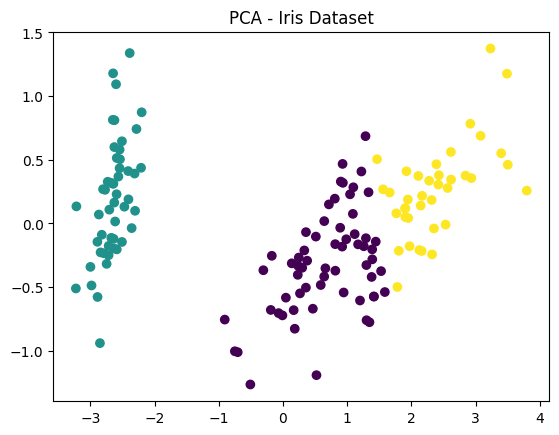

In [29]:
# plot PCA for iris dataset
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# create PCA object
pca = PCA(n_components=3)

# fit PCA
pca.fit(X)

# transform data
X_pca = pca.transform(X)

# plot PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("PCA - Iris Dataset")
plt.show()


Los resultados presentados por Scikit Learn son los mismos que los que regresa nuestro algoritmo. Ambos clasifican a la setosa de manera perfecta y solo existen problemas en la clasificación de virginica y versicolor. Lo cual es entendible porque tienen valores muy parecidos y el algoritmo no es capaz de diferenciarlos en su totalidad.

Además, hemos añadido la gráfica resultante del PCA (Principal  component analysis) para poder visualizar mejor la dispersión de los datos, así como los clusteres que existen el set de datos.

# 4. Conclusiones

Esta práctica ha sido muy útil para poder aplicar los conocimientos adquiridos durante las clases de teoría sobre los algoritmos de clasificación de K-NN y clusterización de K-Means. Al implementar por nuestra cuenta los dos algoritmos, hemos podido entender mejor su funcionamiento.

Además, al haber utilizado los métodos de la librería de Scikit-Learn, ha sido muy fácil comparar los resultados obtenidos con los nuestros. Hemos llegado a la conclusión que la normalización de los datos numéricos y la elección de la métrica, son los factores más influyentes en la decisión de clasificación o clusterización.

El procesamiento de los datos es muy importante para obtener buenos resultados y el tipo de estos también. De esta manera, el dataset de wdbc ha sido el que mejor ha funcionado para ambos algoritmos, ya que todos sus atributos son continuos y la distancia euclídea era la ideal para calcular la proximidad entre los datos.